In [54]:
# loan approval prediction 
# using logistic regression, support vector machine , decision tree
# then compairing their accuracy and using the best model to predict the loan approval
# columns :- Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from colorama import Fore, Style 

data = pd.read_csv('loan_data.csv')

data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<h3 style="color:yellow;"> data cleaning 

In [55]:
# checking null values
print(Fore.RED + Style.BRIGHT + "checking null values :- "); print(Style.RESET_ALL)
print(data.isnull().sum())

checking null values :- 

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64


In [56]:
data.drop('Loan_ID', axis=1, inplace=True)

#@ Fill missing numerical values with mean
numerical_cols = data.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].mean())

#@ Fill missing categorical values with mode
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# checking null values
print(data.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<h3 style="color:yellow;">Changing strings to numbers</h3>

In [57]:
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Define the categorical columns
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Initialize the LabelEncoder
le = LabelEncoder() # for encoding the categorical data

# Splitting the data into test and train sets
x_train, x_test, y_train, y_test = train_test_split(data.drop('Loan_Status', axis=1), data['Loan_Status'], test_size=0.2, random_state=42)

# Initialize a dictionary to hold the label encoders
label_encoders = {}  # for saving the fitted encoders

# Encode the categorical columns
for col in categorical_cols:
    if col != 'Loan_Status':  # Exclude the target variable
        le = LabelEncoder()  # Initialize the LabelEncoder
        x_train[col] = le.fit_transform(x_train[col])  # Fit and transform the training data
        x_test[col] = le.transform(x_test[col])  # Transform the testing data
        label_encoders[col] = le  # Save the fitted encoder

# Encode the target variable separately
# This will convert 'Y' and 'N' into 1 and 0, respectively
le = LabelEncoder()  # Initialize the LabelEncoder
y_train = le.fit_transform(y_train)  # Fit and transform the training data
y_test = le.transform(y_test)  # Transform the testing data
label_encoders['Loan_Status'] = le  # Save the fitted encoder

# Feature Scaling
# This will make their scaling same
scaler = StandardScaler()  # Initialize the StandardScaler
x_train = scaler.fit_transform(x_train)  # Fit and transform the training data
x_test = scaler.transform(x_test)  # Transform the testing data

<p style="color:pink;"> checking the encoding </p>

In [58]:
print("Encoding:", list(le.classes_))

# Print the unique values of y_train and y_test
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

Encoding: ['N', 'Y']
Unique values in y_train: [0 1]
Unique values in y_test: [0 1]


<h3 style="color:yellow;"> traning the  model

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 

#loading the models in different vars
logistic_model = LogisticRegression()
support_vector_model = SVC()
decision_tree_model = DecisionTreeClassifier()

#!training the models
logistic_model.fit(x_train, y_train)
support_vector_model.fit(x_train, y_train)
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

<p style="color:pink;"> RoC curve </p>

AUC-ROC of Logistic Regression: 0.6840336134453782
AUC-ROC of Support Vector Machine: 0.7576470588235295
AUC-ROC of Decision Tree: 0.6134453781512605


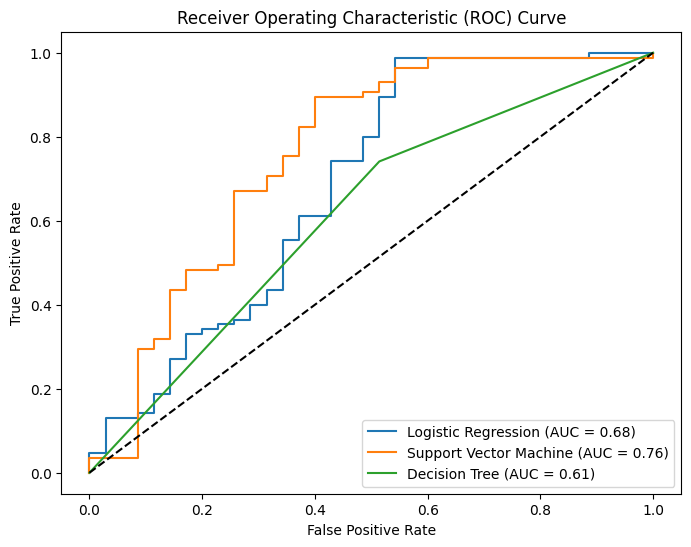

In [60]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate the probabilities of the positive class
y_prob_logistic = logistic_model.predict_proba(x_test)[:, 1]
y_prob_svc = support_vector_model.decision_function(x_test)
y_prob_decision_tree = decision_tree_model.predict_proba(x_test)[:, 1]

# Calculate the AUC-ROC
auc_roc_logistic = roc_auc_score(y_test, y_prob_logistic)
auc_roc_svc = roc_auc_score(y_test, y_prob_svc)
auc_roc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)

# Print the AUC-ROC scores
print(f"AUC-ROC of Logistic Regression: {auc_roc_logistic}")
print(f"AUC-ROC of Support Vector Machine: {auc_roc_svc}")
print(f"AUC-ROC of Decision Tree: {auc_roc_decision_tree}")

# Calculate the ROC curve points
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_prob_logistic)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_prob_svc)
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(y_test, y_prob_decision_tree)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {auc_roc_logistic:.2f})')
plt.plot(fpr_svc, tpr_svc, label=f'Support Vector Machine (AUC = {auc_roc_svc:.2f})')
plt.plot(fpr_decision_tree, tpr_decision_tree, label=f'Decision Tree (AUC = {auc_roc_decision_tree:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal line, which represents a random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

comparing the accuracy of the models

In [61]:
a = auc_roc_logistic; b = auc_roc_svc; c = auc_roc_decision_tree
if (a > b and a > c):
    print(Fore.GREEN + Style.BRIGHT + "Logistic Regression has the highest accuracy")
    best_model = logistic_model
elif (b > a and b > c):
    print(Fore.GREEN + Style.BRIGHT + "Support Vector Machine has the highest accuracy")
    best_model = support_vector_model
else:
    print(Fore.GREEN + Style.BRIGHT + "Decision Tree has the highest accuracy")
    best_model = decision_tree_model

Support Vector Machine has the highest accuracy


<h3 style="color:yellow;"> taking input from the user </h3>

In [62]:
# Python
dummy_input = pd.DataFrame({
    'Gender': ['Male'], 
    'Married': ['Yes'], 
    'Dependents': [1], 
    'Education': ['Graduate'], 
    'Self_Employed': ['No'], 
    'ApplicantIncome': [5000], 
    'CoapplicantIncome': [0], 
    'LoanAmount': [200], 
    'Loan_Amount_Term': [360], 
    'Credit_History': [1], 
    'Property_Area': ['Urban']
})

# Encode and scale the dummy input
for col in categorical_cols:
    if col != 'Loan_Status':  # Exclude the target variable
        dummy_input[col] = label_encoders[col].transform(dummy_input[col])  # Transform the dummy input

dummy_input = scaler.transform(dummy_input)  # Scale the dummy input

# Use the best model to predict
prediction = best_model.predict(dummy_input)

# Decode the prediction
prediction = label_encoders['Loan_Status'].inverse_transform(prediction)

print("The prediction is:", prediction[0])

The prediction is: Y
